In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cassiopeia as cass
import matplotlib.pyplot as plt
import time
import datetime

from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [106]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [107]:
dataset = pd.read_csv("matches.csv")

In [108]:
dataset.head()

,ID,Rank,TOP_BLUE_Champ,JG_BLUE_Champ,MID_BLUE_Champ,BOT_BLUE_Champ,SUP_BLUE_Champ,TOP_RED_Champ,JG_RED_Champ,MID_RED_Champ,BOT_RED_Champ,SUP_RED_Champ,Blue_Win,Red_Win
0,4254552847,diamond,Jayce,Ekko,Veigar,Tahm Kench,Senna,Akali,Talon,Gragas,Jhin,Lux,False,True
1,4251572080,diamond,Aatrox,Jarvan IV,Akali,Aphelios,Soraka,Mordekaiser,Viego,Karma,Ezreal,Leona,True,False
2,4251403578,diamond,Camille,Master Yi,Yasuo,Ezreal,Nautilus,Irelia,Rammus,Katarina,Kai'Sa,Leona,False,True
3,4250631950,diamond,Akali,Kayn,Cassiopeia,Xayah,Thresh,Fiora,Jarvan IV,Yasuo,Kai'Sa,Yuumi,False,True
4,4249706191,diamond,Singed,Talon,Ahri,Ashe,Blitzcrank,Akali,Graves,Lissandra,Jhin,Nautilus,True,False


In [109]:
dataset['Rank'].isnull().sum()

236

In [110]:
dataset["Rank"].fillna("diamond", inplace = True)

In [111]:
dataset = dataset.drop(['ID', 'Red_Win'], axis=1)

In [112]:
dataset.head()

,Rank,TOP_BLUE_Champ,JG_BLUE_Champ,MID_BLUE_Champ,BOT_BLUE_Champ,SUP_BLUE_Champ,TOP_RED_Champ,JG_RED_Champ,MID_RED_Champ,BOT_RED_Champ,SUP_RED_Champ,Blue_Win
0,diamond,Jayce,Ekko,Veigar,Tahm Kench,Senna,Akali,Talon,Gragas,Jhin,Lux,False
1,diamond,Aatrox,Jarvan IV,Akali,Aphelios,Soraka,Mordekaiser,Viego,Karma,Ezreal,Leona,True
2,diamond,Camille,Master Yi,Yasuo,Ezreal,Nautilus,Irelia,Rammus,Katarina,Kai'Sa,Leona,False
3,diamond,Akali,Kayn,Cassiopeia,Xayah,Thresh,Fiora,Jarvan IV,Yasuo,Kai'Sa,Yuumi,False
4,diamond,Singed,Talon,Ahri,Ashe,Blitzcrank,Akali,Graves,Lissandra,Jhin,Nautilus,True


In [113]:
dataset["Blue_Win"] = dataset["Blue_Win"].astype(int)

In [114]:
dataset.head(10)

,Rank,TOP_BLUE_Champ,JG_BLUE_Champ,MID_BLUE_Champ,BOT_BLUE_Champ,SUP_BLUE_Champ,TOP_RED_Champ,JG_RED_Champ,MID_RED_Champ,BOT_RED_Champ,SUP_RED_Champ,Blue_Win
0,diamond,Jayce,Ekko,Veigar,Tahm Kench,Senna,Akali,Talon,Gragas,Jhin,Lux,0
1,diamond,Aatrox,Jarvan IV,Akali,Aphelios,Soraka,Mordekaiser,Viego,Karma,Ezreal,Leona,1
2,diamond,Camille,Master Yi,Yasuo,Ezreal,Nautilus,Irelia,Rammus,Katarina,Kai'Sa,Leona,0
3,diamond,Akali,Kayn,Cassiopeia,Xayah,Thresh,Fiora,Jarvan IV,Yasuo,Kai'Sa,Yuumi,0
4,diamond,Singed,Talon,Ahri,Ashe,Blitzcrank,Akali,Graves,Lissandra,Jhin,Nautilus,1
5,diamond,Akali,Kha'Zix,Cassiopeia,Kai'Sa,Pantheon,Gangplank,Olaf,Ryze,Aphelios,Seraphine,1
6,platinum,Malphite,Lee Sin,Qiyana,Vayne,Alistar,Akali,Rek'Sai,Rumble,Jhin,Morgana,0
7,diamond,Akali,Vi,Sylas,Jhin,Pyke,Fiora,Volibear,Yasuo,Caitlyn,Taliyah,1
8,diamond,Irelia,Fiddlesticks,Akali,Lucian,Senna,Zeri,Rek'Sai,Karma,Jinx,Leona,1
9,diamond,Yorick,Skarner,Akali,Jhin,Senna,Camille,Hecarim,Ahri,Kai'Sa,Nautilus,0


In [115]:
dataset = dataset.dropna()

In [116]:
dataset.shape

(4475, 12)

In [117]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ["Rank","TOP_BLUE_Champ", "JG_BLUE_Champ", "MID_BLUE_Champ", "BOT_BLUE_Champ", "SUP_BLUE_Champ",'TOP_RED_Champ','JG_RED_Champ','MID_RED_Champ','BOT_RED_Champ','SUP_RED_Champ'])

In [118]:
one_hot_encoded_data.head()

,Blue_Win,Rank_bronze,Rank_diamond,Rank_gold,Rank_master,Rank_platinum,Rank_silver,TOP_BLUE_Champ_Aatrox,TOP_BLUE_Champ_Ahri,TOP_BLUE_Champ_Akali,...,SUP_RED_Champ_Xerath,SUP_RED_Champ_Yasuo,SUP_RED_Champ_Yuumi,SUP_RED_Champ_Zac,SUP_RED_Champ_Zed,SUP_RED_Champ_Zeri,SUP_RED_Champ_Ziggs,SUP_RED_Champ_Zilean,SUP_RED_Champ_Zoe,SUP_RED_Champ_Zyra
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
one_hot_encoded_data.iloc[:,1:]

,Rank_bronze,Rank_diamond,Rank_gold,Rank_master,Rank_platinum,Rank_silver,TOP_BLUE_Champ_Aatrox,TOP_BLUE_Champ_Ahri,TOP_BLUE_Champ_Akali,TOP_BLUE_Champ_Akshan,...,SUP_RED_Champ_Xerath,SUP_RED_Champ_Yasuo,SUP_RED_Champ_Yuumi,SUP_RED_Champ_Zac,SUP_RED_Champ_Zed,SUP_RED_Champ_Zeri,SUP_RED_Champ_Ziggs,SUP_RED_Champ_Zilean,SUP_RED_Champ_Zoe,SUP_RED_Champ_Zyra
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4645,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4646,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4647,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(one_hot_encoded_data.iloc[:,1:], one_hot_encoded_data.iloc[:,0], test_size=0.15, random_state=0)

In [121]:
X_train.shape

(3803, 965)

In [122]:
model_one_hot = keras.Sequential() # create model

model_one_hot.add(layers.Dense(2, input_dim=965, activation='relu')) # Input layer

model_one_hot.add(layers.Dense(1, activation='sigmoid')) # output layer

model_one_hot.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_one_hot.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 1932      
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,935
Trainable params: 1,935
Non-trainable params: 0
_________________________________________________________________


In [123]:
# validation_data=(X_test, Y_test)
fit_model_one_hot = model_one_hot.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40)

Epoch 1/40
119/119 [==============================] - 1s 5ms/step - loss: 0.6927 - acc: 0.5162 - val_loss: 0.6923 - val_acc: 0.5149
Epoch 2/40
119/119 [==============================] - 0s 3ms/step - loss: 0.6846 - acc: 0.5504 - val_loss: 0.6930 - val_acc: 0.5238
Epoch 3/40
119/119 [==============================] - 0s 3ms/step - loss: 0.6766 - acc: 0.5669 - val_loss: 0.6948 - val_acc: 0.4985
Epoch 4/40
119/119 [==============================] - 0s 3ms/step - loss: 0.6673 - acc: 0.5906 - val_loss: 0.6966 - val_acc: 0.5045
Epoch 5/40
119/119 [==============================] - 0s 3ms/step - loss: 0.6574 - acc: 0.6124 - val_loss: 0.7003 - val_acc: 0.5134
Epoch 6/40
119/119 [==============================] - 0s 3ms/step - loss: 0.6475 - acc: 0.6263 - val_loss: 0.7046 - val_acc: 0.5149
Epoch 7/40
119/119 [==============================] - 0s 3ms/step - loss: 0.6380 - acc: 0.6432 - val_loss: 0.7089 - val_acc: 0.5253
Epoch 8/40
119/119 [==============================] - 0s 3ms/step - loss: 0.

In [124]:
dataset

,Rank,TOP_BLUE_Champ,JG_BLUE_Champ,MID_BLUE_Champ,BOT_BLUE_Champ,SUP_BLUE_Champ,TOP_RED_Champ,JG_RED_Champ,MID_RED_Champ,BOT_RED_Champ,SUP_RED_Champ,Blue_Win
0,diamond,Jayce,Ekko,Veigar,Tahm Kench,Senna,Akali,Talon,Gragas,Jhin,Lux,0
1,diamond,Aatrox,Jarvan IV,Akali,Aphelios,Soraka,Mordekaiser,Viego,Karma,Ezreal,Leona,1
2,diamond,Camille,Master Yi,Yasuo,Ezreal,Nautilus,Irelia,Rammus,Katarina,Kai'Sa,Leona,0
3,diamond,Akali,Kayn,Cassiopeia,Xayah,Thresh,Fiora,Jarvan IV,Yasuo,Kai'Sa,Yuumi,0
4,diamond,Singed,Talon,Ahri,Ashe,Blitzcrank,Akali,Graves,Lissandra,Jhin,Nautilus,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4644,platinum,Quinn,Lee Sin,Anivia,Lucian,Karma,Gangplank,Ekko,Yone,Zeri,Seraphine,1
4645,platinum,Tryndamere,Kayn,Lissandra,Jinx,Nautilus,Darius,Kha'Zix,Vladimir,Kai'Sa,Yuumi,0
4646,platinum,Cho'Gath,Ekko,Yone,Ashe,Janna,Quinn,Lee Sin,Xerath,Vayne,Zilean,1
4647,platinum,Malphite,Diana,Akshan,Caitlyn,Lulu,Riven,Lee Sin,Syndra,Vayne,Tahm Kench,1


In [125]:
dataset_categoriical = dataset

In [126]:
for col_name in dataset_categoriical.columns:
        dataset_categoriical[col_name]= dataset_categoriical[col_name].astype('category')
        dataset_categoriical[col_name] = dataset_categoriical[col_name].cat.codes

In [127]:
dataset_categoriical

,Rank,TOP_BLUE_Champ,JG_BLUE_Champ,MID_BLUE_Champ,BOT_BLUE_Champ,SUP_BLUE_Champ,TOP_RED_Champ,JG_RED_Champ,MID_RED_Champ,BOT_RED_Champ,SUP_RED_Champ,Blue_Win
0,1,41,6,102,51,58,2,56,27,18,32,0
1,1,0,18,2,4,66,58,67,40,12,28,1
2,1,12,29,114,12,42,33,42,43,20,28,0
3,1,2,22,11,63,74,23,18,115,20,83,0
4,1,91,54,1,5,9,2,14,52,18,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4644,4,76,26,4,31,23,24,7,116,67,56,1
4645,4,101,22,50,23,42,16,24,109,20,83,0
4646,4,14,6,115,5,19,70,26,113,55,88,1
4647,4,60,5,3,7,31,74,26,91,55,66,1


In [128]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(dataset_categoriical.iloc[:,0:11], dataset_categoriical.iloc[:,11], test_size=0.15, random_state=0)

In [129]:
X_train_2.shape

(3803, 11)

In [130]:
model_categorical = keras.Sequential() # create model

model_categorical.add(layers.Dense(150, input_dim=11, activation='relu')) # Input layer

model_categorical.add(layers.Dense(1, activation='sigmoid')) # output layer

model_categorical.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_categorical.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 150)               1800      
                                                                 
 dense_15 (Dense)            (None, 1)                 151       
                                                                 
Total params: 1,951
Trainable params: 1,951
Non-trainable params: 0
_________________________________________________________________


In [131]:
# validation_data=(X_test, Y_test)
fit_model_categorical = model_categorical.fit(X_train_2, Y_train_2, validation_data=(X_test_2, Y_test_2), epochs=40)

Epoch 1/40
119/119 [==============================] - 1s 4ms/step - loss: 1.6157 - acc: 0.4894 - val_loss: 1.0016 - val_acc: 0.4792
Epoch 2/40
119/119 [==============================] - 0s 3ms/step - loss: 0.8869 - acc: 0.5204 - val_loss: 0.9408 - val_acc: 0.4688
Epoch 3/40
119/119 [==============================] - 0s 3ms/step - loss: 0.8130 - acc: 0.5319 - val_loss: 0.8820 - val_acc: 0.4881
Epoch 4/40
119/119 [==============================] - 0s 3ms/step - loss: 0.8269 - acc: 0.5435 - val_loss: 1.0060 - val_acc: 0.4851
Epoch 5/40
119/119 [==============================] - 1s 5ms/step - loss: 0.8010 - acc: 0.5333 - val_loss: 0.8428 - val_acc: 0.5104
Epoch 6/40
119/119 [==============================] - 1s 4ms/step - loss: 0.7740 - acc: 0.5388 - val_loss: 0.8346 - val_acc: 0.4420
Epoch 7/40
119/119 [==============================] - 0s 4ms/step - loss: 0.7746 - acc: 0.5456 - val_loss: 0.8675 - val_acc: 0.5089
Epoch 8/40
119/119 [==============================] - 0s 3ms/step - loss: 0.

In [132]:
a= np.array([[1,	41,	6,	102,	51,	58,	2,	56,	27,	18,	32	],[1,	0,	18,	2,	4,	66,	58,	67,	40,	12,	28	]])
print(model_categorical.predict(a))

[[0.4824767 ]
 [0.41832417]]


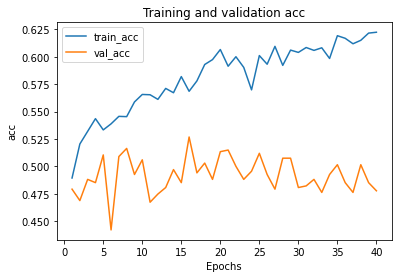

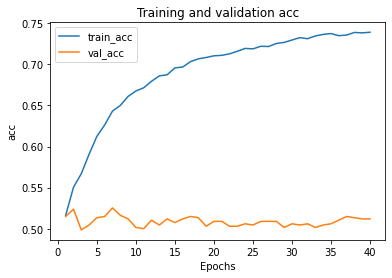

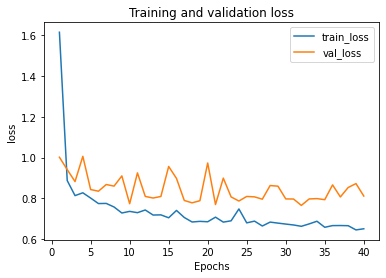

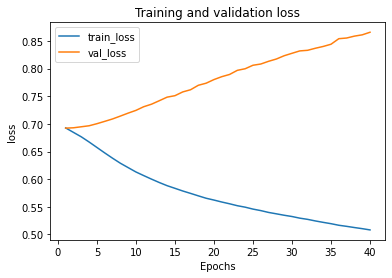

In [133]:
plot_metric(fit_model_categorical,'acc')
plot_metric(fit_model_one_hot,'acc')
plot_metric(fit_model_categorical,'loss')
plot_metric(fit_model_one_hot,'loss')